# ASHLY THAMPI - 21BDA19

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [137]:
#breast_cance = pd.read_csv(https://www.kaggle.com/datasets/shankarat/breast-cancer)

In [138]:
df = pd.read_csv("/Users/ashlythampi/Downloads/SEM 2/BD2P3/breast cancer.csv")

In [139]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [140]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [141]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [142]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [143]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [144]:
#DROP ALERT 1 : Unnamed:32 column has all nulls. 
df = df.drop(['Unnamed: 32'],axis=1)

In [145]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

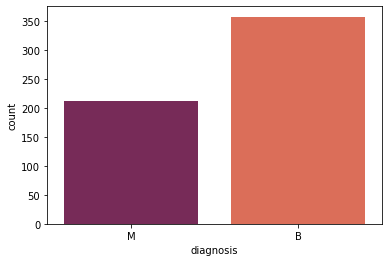

In [146]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,palette='rocket')

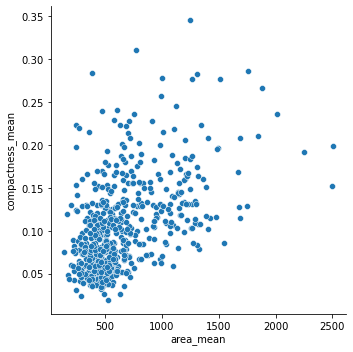

In [167]:
sns.relplot(x = "area_mean", y = "compactness_mean", data = df)

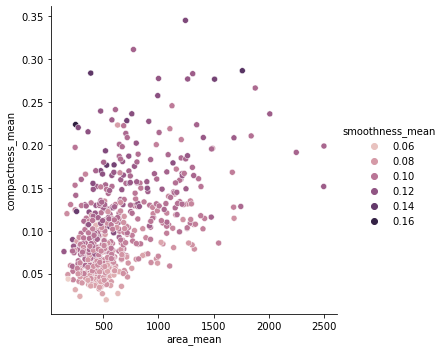

In [169]:
sns.relplot(x = "area_mean", y = "compactness_mean",hue="smoothness_mean", data = df)

<AxesSubplot:>

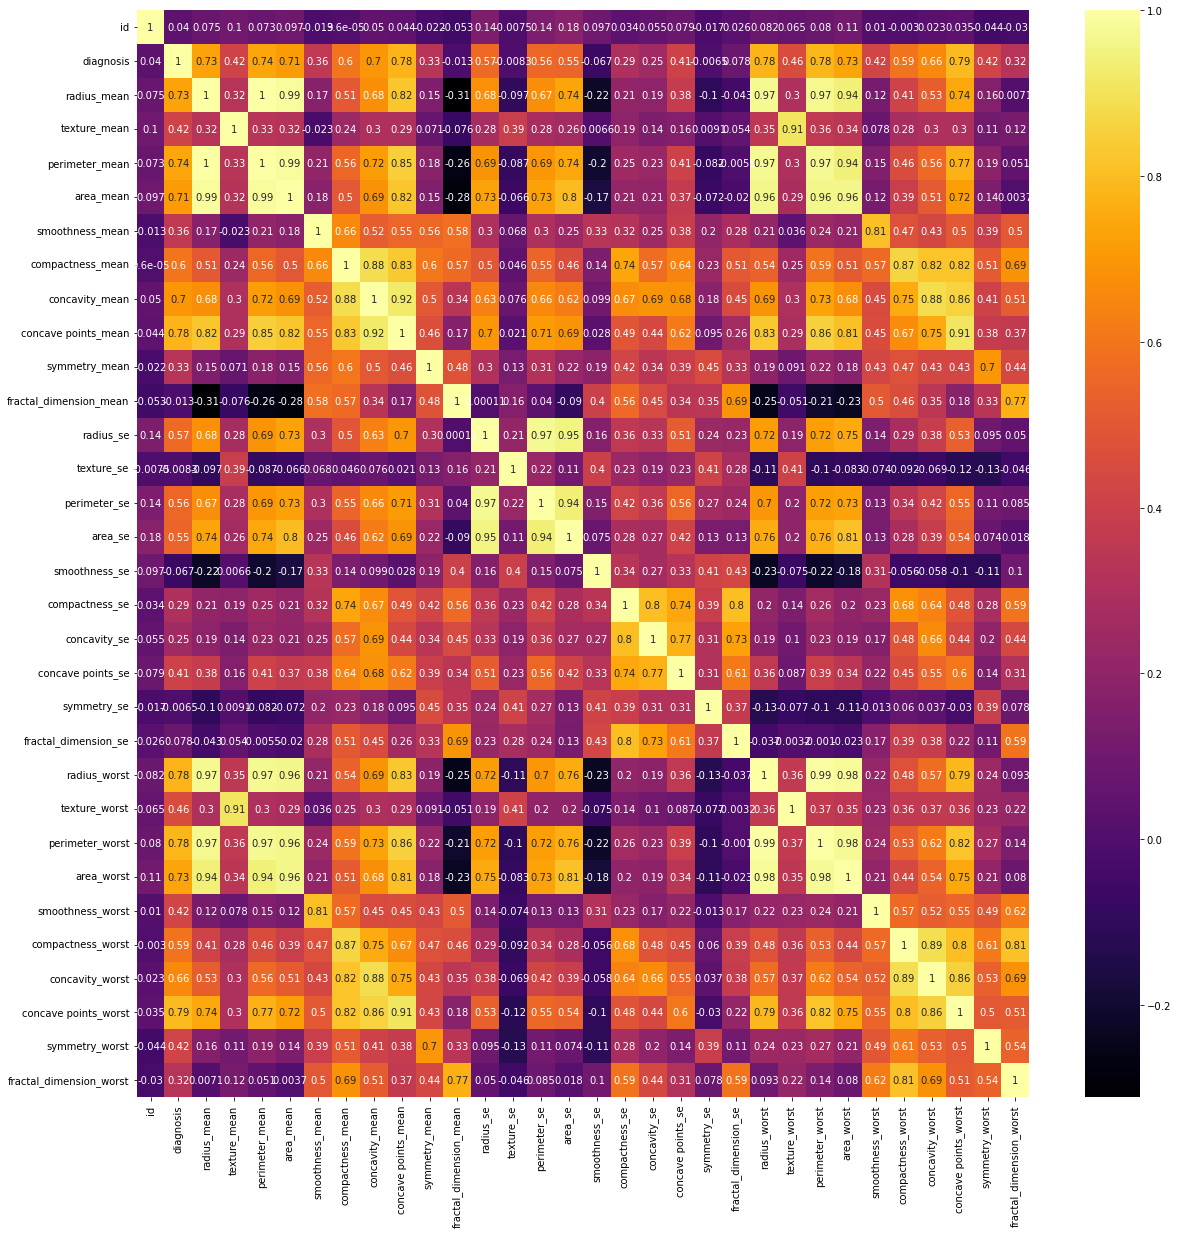

In [171]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap = "inferno")

<Figure size 1440x1440 with 0 Axes>

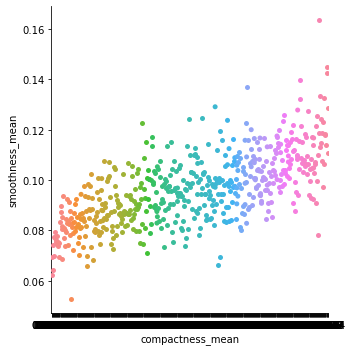

In [174]:
plt.figure(figsize = (20,20))
sns.catplot(x = "compactness_mean", y = "smoothness_mean", data = df)

## Heatmap to visualize and find the coefficient of multicollinearity.

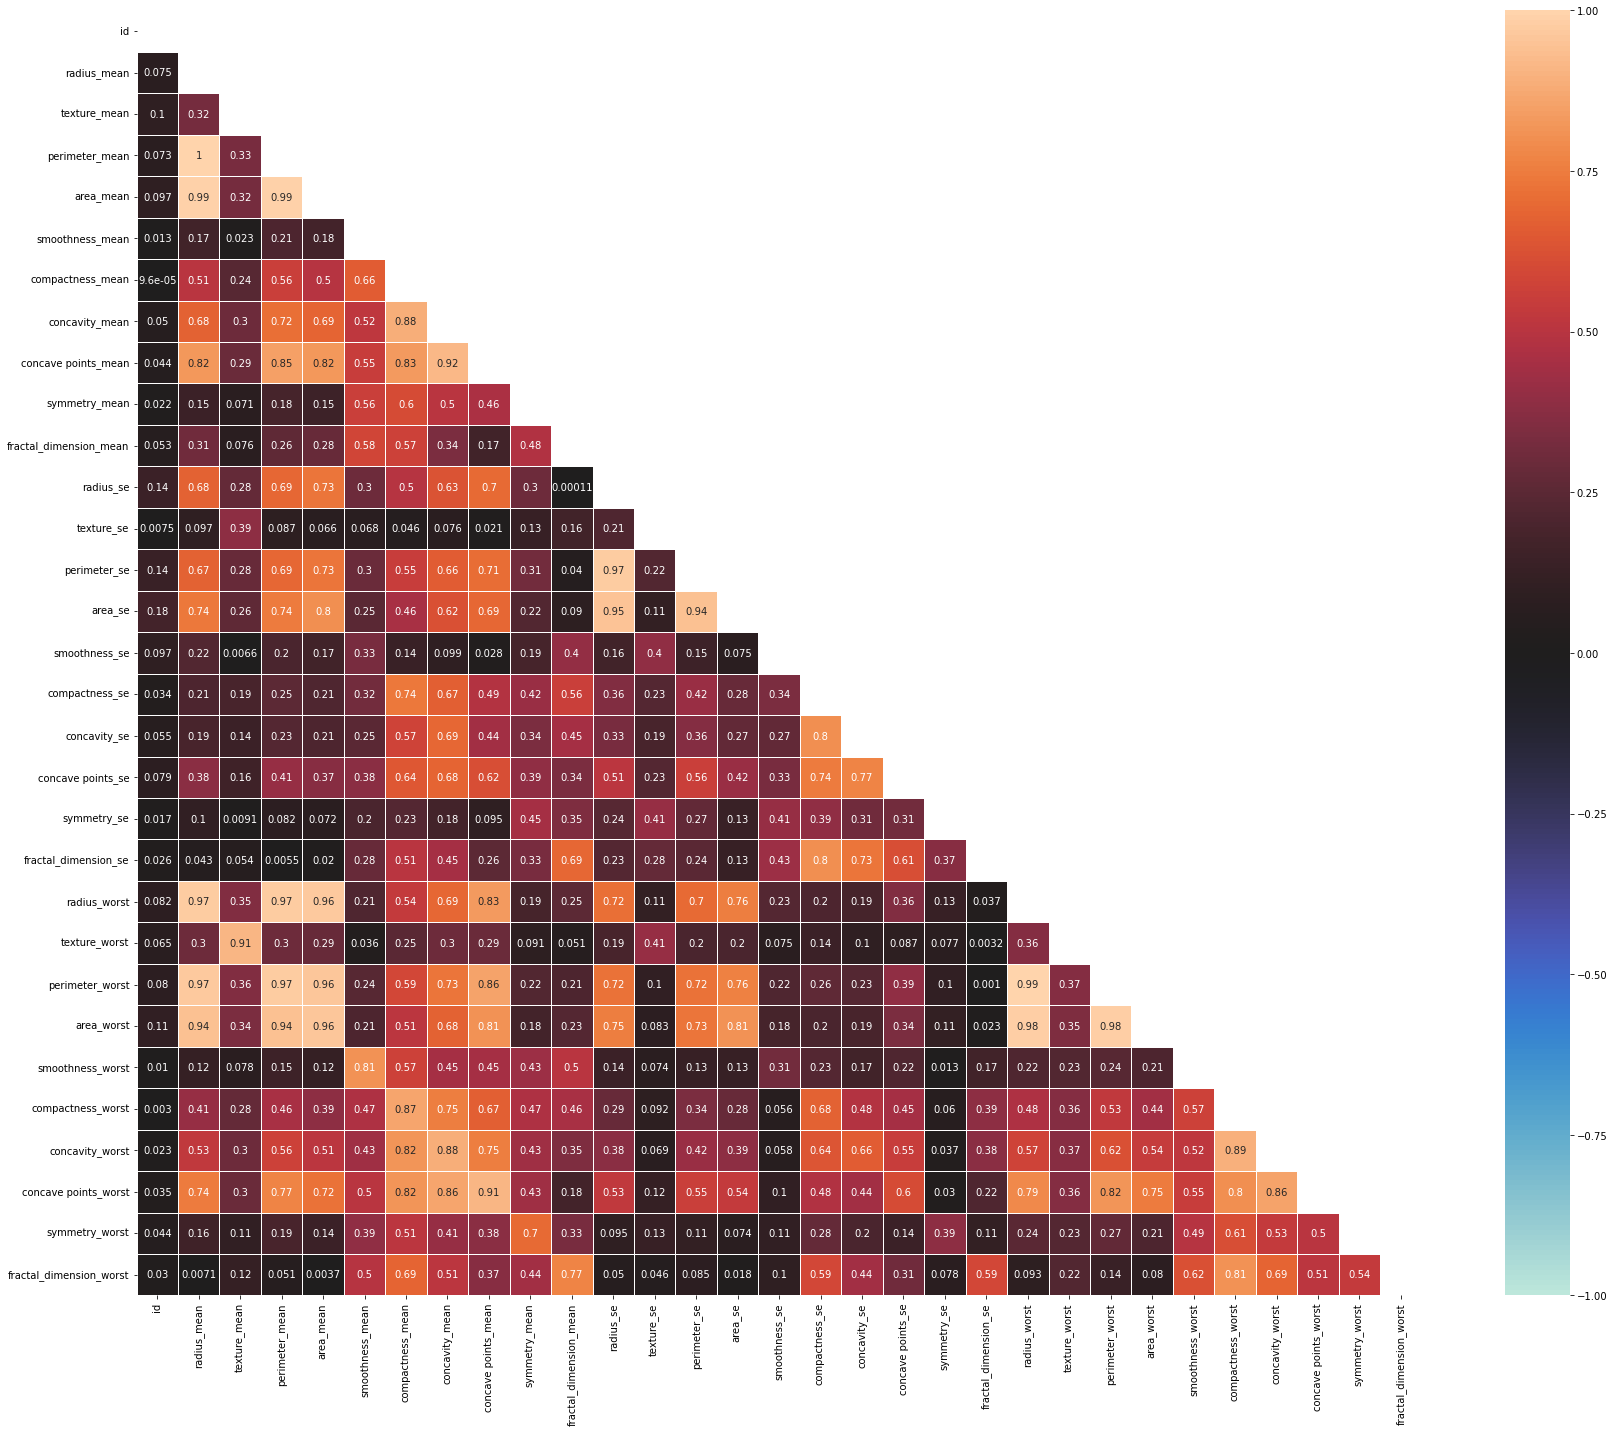

In [147]:
df_corr = df.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 20))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()


In [148]:
print ('Correlation matrix Shape =  ', df_corr.shape)

Correlation matrix Shape =   (31, 31)


In [149]:
scaler = StandardScaler()
X = df.drop('diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)

In [150]:
pca = PCA()
pca.fit_transform(X_scaled)
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

array([[ 9.18319983e+00,  1.97127137e+00, -1.17162471e+00, ...,
        -3.39113949e-02,  4.55717832e-02, -4.71657487e-02],
       [ 2.38329766e+00, -3.75345877e+00, -5.80228664e-01, ...,
         3.26298575e-02, -5.90208043e-03, -1.84483129e-03],
       [ 5.74247239e+00, -1.08035048e+00, -5.33087882e-01, ...,
         4.70218699e-02,  3.28969989e-03,  7.35346039e-04],
       ...,
       [ 1.25189010e+00, -1.89397674e+00,  5.34466848e-01, ...,
        -2.56758630e-03,  6.34033194e-03,  3.80807814e-03],
       [ 1.03650353e+01,  1.69639755e+00, -1.90741785e+00, ...,
        -6.80834660e-02, -8.43022898e-02, -2.37630430e-02],
       [-5.47826365e+00, -6.72788035e-01,  1.47716504e+00, ...,
        -9.51329032e-03, -6.10512178e-02, -1.94561856e-02]])

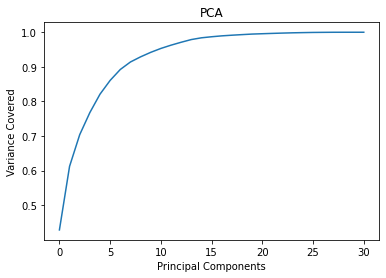

In [151]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Almost 15 columns can explain more than 95% variance 

In [152]:
pca = PCA(n_components=15)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC7,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231610,-0.090395,-0.875268,0.264551,-0.859594,0.104562,-0.690062
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426916,-0.659939,1.085345,0.810102,0.158547,-0.945864,-0.651361
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010712,-0.082306,0.426614,-0.603992,0.122951,-0.409013,0.014279
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272638,-1.171377,-1.219464,-1.138544,1.003890,-0.925912,-0.494977
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629119,-0.166354,0.379517,0.649893,-0.109990,0.387836,-0.539592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399112,1.197814,-0.071089,2.028789,-1.345195,-0.522454,-0.184012,1.045676,0.365117,-0.072626,0.129720,-0.060003,-0.397292
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080422,-1.024112,-0.585571,-0.949736,-0.258745,-0.134605,0.246298,0.222095,-0.192646,0.016360
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806,-0.178668,0.262115,0.475977,0.580846,-0.847770,0.101493,0.151470,0.290627
567,10.365035,1.696398,-1.907418,-2.351807,-0.028220,-0.656720,-0.195264,0.275202,-0.072776,-0.518182,-0.117397,-0.178068,-0.696733,1.226315,0.218642


In [153]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
y=df['diagnosis']

Replace Label column (diagnosis) into binary codes.

## Model building

In [154]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25, random_state= 355)
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

Generate Classification report to find Precision,Recall and F1 score.

In [155]:
print (classification_report(y_test,y_pred,digits=2))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



Precision

In [156]:
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))
#It is the ‘Exactness’, ability of the model to return only relevant instances

Precision 1.00


Recall

In [157]:
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))
#It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity.

Recall 0.97


f1

In [158]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))
#Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1. F1

F1 Score 0.98


Specificity

In [159]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))
#It is also referred to as ‘True Negative Rate’ (Proportion of actual negatives that are correctly identified),
#i.e. more True Negatives the data hold the higher its Specificity.

Specificity 1.00


In [160]:
#https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

In [161]:
#y_pred_proba = LR.predict_proba(X_test)
#skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
#plt.show()

Confusion Matrix

In [162]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[93,  0],
       [ 3, 47]])

In [163]:
tp = confusion_matrix[0,0]
fp = confusion_matrix[0,1]
fn = confusion_matrix[1,0]
tn = confusion_matrix[1,1]
print ('True Positive  >', tp)
print ('False Positive >', fp)
print ('False Negetive >', fn)
print ('True Negetive  >', tn)

True Positive  > 93
False Positive > 0
False Negetive > 3
True Negetive  > 47


Heat Map for consusion matrix

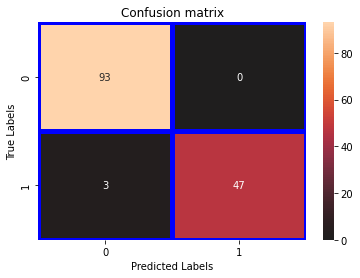

In [164]:
ax=plt.subplot()
sns.heatmap(confusion_matrix,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
plt.show()

In [128]:
print ('Final prediction >', round((tp+tn)/(len(y_pred))*100,2))

Final prediction > 97.9


Model is able to predict with 97.9% accuracy of the test data.

ROC

In [176]:
from sklearn import metrics

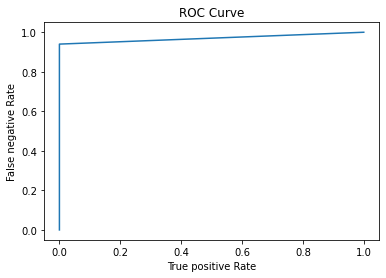

In [177]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("True positive Rate")
plt.ylabel("False negative Rate")
plt.show()
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds

AUROC

In [178]:
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.97


In [181]:
fn = 93
fp = 0
total=143

In [182]:
MR = (fn+fp)/total
print("Misclassification Rate {:0.2f}".format(MR))
#misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model

Misclassification Rate 0.65
